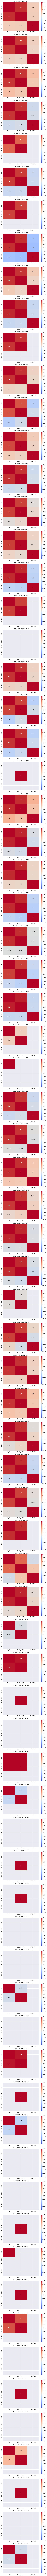

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar archivo
df = pd.read_csv(r"C:\Users\iazuaz\PyCharmMiscProject\sucursales\DOTACION_EFECTIVIDAD.csv", sep=";")
df.columns = ["COD_SUC", "FECHA", "T_AO", "T_AO_VENTA", "P_EFECTIVIDAD", "T_VISITAS", "DOTACION"]
df["P_EFECTIVIDAD"] = df["P_EFECTIVIDAD"].str.replace(",", ".").astype(float)
# Define numeric_columns primero
numeric_columns = ["T_AO", "T_AO_VENTA", "T_VISITAS", "DOTACION"]
# Luego úsala en la operación con el DataFrame
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")
df[numeric_columns := ["T_AO", "T_AO_VENTA", "T_VISITAS", "DOTACION"]] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")
df["FECHA"] = pd.to_datetime(df["FECHA"], errors="coerce")

# Visualizar correlaciones por sucursal
target_vars = ["T_AO", "T_AO_VENTA", "T_VISITAS"]
sucursales = df["COD_SUC"].unique()

fig, axes = plt.subplots(nrows=len(sucursales), figsize=(6, 4 * len(sucursales)))

if len(sucursales) == 1:
    axes = [axes]

for i, suc in enumerate(sucursales):
    sub_df = df[df["COD_SUC"] == suc][target_vars]
    corr = sub_df.corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[i])
    axes[i].set_title(f"Correlación - Sucursal {suc}")

plt.tight_layout()
plt.show()
